<a href="https://colab.research.google.com/github/tariqdaouda/D3_intro/blob/master/D3_intro_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook you will find practical examples for every part of the theoretical part. Including how to build and train deep neural networks.

You will also find questions that are designed to help you notice important concepts and implementation details.

T.

In [0]:
#@title Loading important packages

import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# KNN classifier

In [0]:
#@title loading relevant packages
import sklearn.datasets as SKD

In [0]:
#@title Transforming the raw data into a pandas dataframe for plotting and viewing

iris_X, iris_y = SKD.load_iris(return_X_y=True)

iris_df = pd.DataFrame.from_dict(
  {
      "sepal_length": iris_X[:, 0],
      "sepal_width": iris_X[:, 1],
      "petal_length": iris_X[:, 2],
      "petal_width": iris_X[:, 3],
      "species": iris_y
  }
)

In [0]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


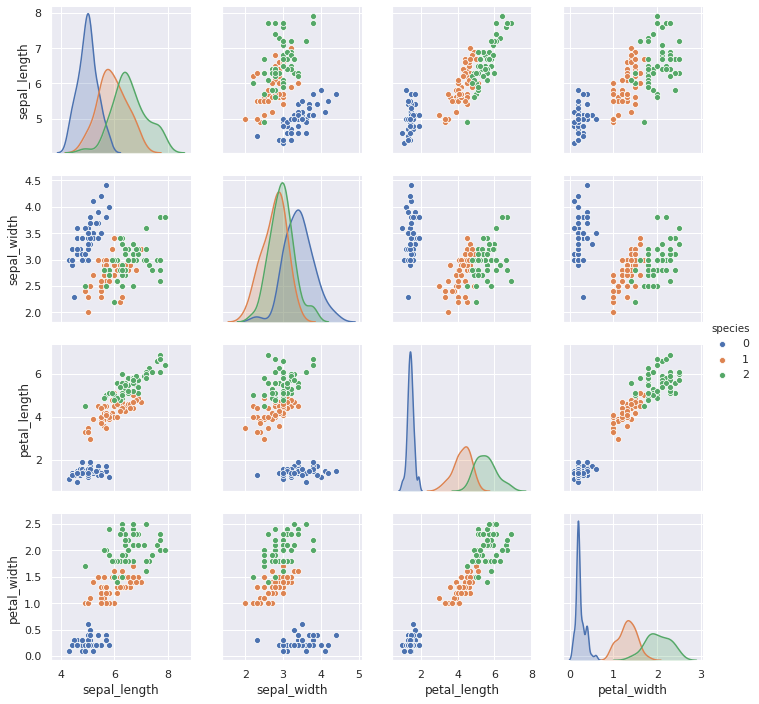

In [0]:
sns.pairplot(iris_df, hue='species', height=2.5, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']);

In [0]:
import sklearn.neighbors as KNN
from sklearn.model_selection import train_test_split
clf = KNN.KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.4, random_state=0)
clf.fit(X_train, y_train)
print("Test set accuracy:", clf.score(X_test, y_test) )
print("Train set accuracy:", clf.score(X_train, y_train) )

test set accuracy: 0.95
train set accuracy: 1.0


### 1- Explain in your own words why the score we care about is the score on test set and not on the train set?

### 2- Why is the test accuracy lower than the train accuracy? Is this expected?

In [0]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=1000, class_weight="balanced")
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.4, random_state=0)
clf.fit(X_train, y_train)
print("Test set accuracy:", clf.score(X_test, y_test) )
print("Train set accuracy:", clf.score(X_train, y_train) )

Test set accuracy: 0.9166666666666666
Train set accuracy: 0.9888888888888889


### 1- Explain cross validation in your own words:

### 2- Why is it important to make sure to balance classes?

# Neural networks

In this part we will be diving into building neural networks with the framework **pyTorch**. All the examples presented will be on the MNIST dataset. **MNIST** is a dataset of labeled handwritten digits, that has been termed the "drosophila of neural networks".

The amount of knowledge we have on MNIST as well as the small size of the dataset (10K examples for each digit, 28x28 pixels) make it a great dataset for experimenting, testing and validating new idea before moving on to more complicated datasets (ex: biology).

In [0]:
#@ importing packages we need
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

#progess bar
from tqdm import tqdm

In [0]:
#Loading mnist
#question: what is the difference between the dataset and the loader?
#answer:

#Important: notice the torchvision.transforms.ToTensor()
#Question: What's the reason behind it?
#Answer:

train_dataset = torchvision.datasets.MNIST('./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=512, shuffle=True)

test_dataset = torchvision.datasets.MNIST('./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512, shuffle=True)


## Fully connected neural network classifier

In [0]:
#Define the classifier
class FCClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, nb_classes):
        super(FCClassifier, self).__init__()
        #Question: How many hidden layers does this network have?
        #Answer:
        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer3 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer4 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer5 = torch.nn.Linear(hidden_size, nb_classes)

    def forward(self, x):
        #Question: What happens within the forward function?
        #Answer:
        #Question: What is this line for?
        #Answer:
        x = torch.flatten(x, start_dim=1, end_dim=-1)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        x = F.relu(x)
        x = self.layer5(x)
        
        return x

fc_classifier = FCClassifier(input_size=28*28, hidden_size=128, nb_classes=10)
fc_classifier

FCClassifier(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=10, bias=True)
)

#### Defining functions for training and testing the model

In [0]:
#Question: what is an epoch?
#Answer:

def train_pass(model, data_loader, optimizer, criterion, device):
    model.to(device)
    model.train()

    pass_loss = 0.0
    for images, labels in data_loader:
        #Question: What is the purpose of this line?
        #Answer:
        images = images.to(device)
        labels = labels.to(device)
        # reset gradients to zero (VERY IMPORTANT)
        optimizer.zero_grad()

        # forward pass
        outputs = model(images)
        # compute loss
        loss = criterion(outputs, labels)
        #Question: What is the purpose of this line?
        #Answer:
        loss.to(device)
        # backward pass (computing gradients)
        loss.backward()
        # update weights
        optimizer.step()
        
        pass_loss += loss.item()

    return pass_loss/len(data_loader)
    
def test_pass(model, data_loader, criterion, device):
  #Question: What is the role of torch.no_grad()?
  #Answer:
  with torch.no_grad():
    pass_loss = 0.0
    for images, labels in data_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        pass_loss += loss.item()
    
    return pass_loss/len(data_loader)

def run_training(model, nb_epochs, train_loader, test_loader, optimizer, criterion, device):
  #Question: What is the purpose of this line?
  #Answer:
  model = model.to(device)
  progress_bar = tqdm(range(nb_epochs))
  loss_history = []
  for epoch in progress_bar:
      test_loss = test_pass(model, test_loader, criterion, device)
      train_loss = train_pass(model, train_loader, optimizer, criterion, device)
      loss_history.append(
          {"loss": train_loss, "set": "train", "epochs": epoch}
      )
      loss_history.append(
          {"loss": test_loss, "set": "test", "epochs": epoch}
      )
  return pd.DataFrame(loss_history)


### Training the model

In [0]:
#Define the the loss criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(fc_classifier.parameters(), lr=0.001, momentum=0.9)

In [0]:
training_history = run_training(fc_classifier, 100, train_loader, test_loader, optimizer, criterion, device="cuda")

In [0]:
training_history.head()

,loss,set,epochs
0,271.768390,train,0
1,46.031542,test,0
2,271.482309,train,1
3,45.982766,test,1
4,271.220033,train,2


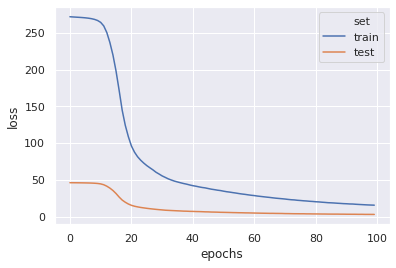

In [0]:
ax = sns.lineplot(x="epochs", y="loss", hue= "set", data=training_history)

## Convolutional neural network classifier

In [0]:
#Define the classifier
class ConvClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, nb_classes):
      super(ConvClassifier, self).__init__()

      self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=3, kernel_size=5)
      self.pool = torch.nn.MaxPool2d(2, 2)
      self.conv2 = torch.nn.Conv2d(in_channels=3, out_channels=5, kernel_size=2)
      self.fc1 = torch.nn.Linear(5*11*11, hidden_size)
      self.fc2 = torch.nn.Linear(hidden_size, nb_classes)

    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = self.pool(x)
      x = self.conv2(x)
      x = F.relu(x)
      
      #Question: What does this line do?
      #Answer:
      x = torch.flatten(x, start_dim=1, end_dim=-1)
      #Question: Can you replace it by this one: x = x.view(-1, 5*11*11)?
      #Answer:

      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      
      return x

conv_classifier = ConvClassifier(input_size=28*28, hidden_size=128, nb_classes=10)
conv_classifier   

ConvClassifier(
  (conv1): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(3, 5, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=605, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [0]:
#Define the the loss criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(conv_classifier.parameters(), lr=0.001, momentum=0.9)

In [0]:
training_history = run_training(conv_classifier, 100, train_loader, test_loader, optimizer, criterion, device="cuda")

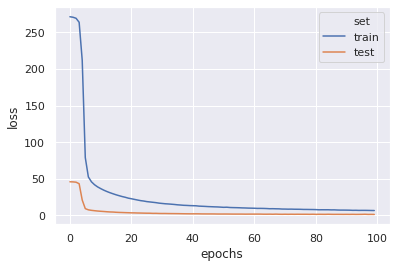

In [0]:
ax = sns.lineplot(x="epochs", y="loss", hue= "set", data=training_history)

## Basic Autoencoder

In [0]:
#Define the classifier
class AutoEncoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size, bottleneck_size):
        super(AutoEncoder, self).__init__()

        self.layer1 = torch.nn.Linear(input_size, hidden_size)
        self.layer2 = torch.nn.Linear(hidden_size, bottleneck_size)
        self.bottleneck = torch.nn.Linear(bottleneck_size, hidden_size)
        self.layer3 = torch.nn.Linear(hidden_size, hidden_size)
        self.layer4 = torch.nn.Linear(hidden_size, input_size)

    def forward(self, x):
        #Question: Are there any differences between this function and the forward of the FCClassifier?
        #Answer:
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.bottleneck(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        x = self.layer4(x)
        
        return x

autoencoder = AutoEncoder(input_size=28*28, hidden_size=512, bottleneck_size=100)
autoencoder


AutoEncoder(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=100, bias=True)
  (bottleneck): Linear(in_features=100, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=512, bias=True)
  (layer4): Linear(in_features=512, out_features=784, bias=True)
)

In [0]:
#Question: What are the differences between these training functions and the ones we used for classification?
#Answer:

def ae_train_pass(model, data_loader, optimizer, criterion, device):
    model.train()

    pass_loss = 0.0
    for images, labels in data_loader:
        images = images.to(device)
        images = torch.flatten(images, start_dim=1, end_dim=-1)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, images)
        loss.to(device)
        loss.backward()
        optimizer.step()
        
        pass_loss += loss.item()

    return pass_loss/len(data_loader)
    
def ae_test_pass(model, data_loader, criterion, device):
  with torch.no_grad():
    pass_loss = 0.0
    for images, labels in data_loader:
        images = images.to(device)
        images = torch.flatten(images, start_dim=1, end_dim=-1)

        outputs = model(images)
        loss = criterion(outputs, images)
        loss.to(device)
        pass_loss += loss.item()
    
    return pass_loss/len(data_loader)

def ae_run_training(model, nb_epochs, train_loader, test_loader, optimizer, criterion, device):
  model = model.to(device)
  progress_bar = tqdm(range(nb_epochs))
  loss_history = []
  for epoch in progress_bar:
      test_loss = ae_test_pass(model, test_loader, criterion, device)
      train_loss = ae_train_pass(model, train_loader, optimizer, criterion, device)
      loss_history.append(
          {"loss": train_loss, "set": "train", "epochs": epoch}
      )
      loss_history.append(
          {"loss": test_loss, "set": "test", "epochs": epoch}
      )
  return pd.DataFrame(loss_history)


In [0]:
#Define the the loss criterion and optimizer
#Question: Why are we using a different loss?
#Answer:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(autoencoder.parameters(), lr=0.001, momentum=0.9)

In [0]:
training_history = ae_run_training(autoencoder, 100, train_loader, test_loader, optimizer, criterion, device="cuda")

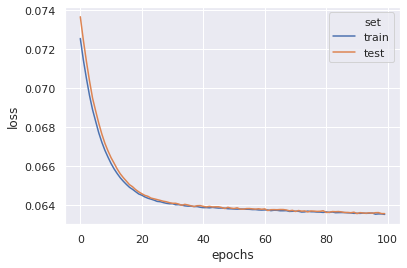

In [0]:
ax = sns.lineplot(x="epochs", y="loss", hue= "set", data=training_history)

In [0]:
#functions for plotting images (real, and reconstructions)
def show_images(images):
  npimgs= images.numpy()
  npimgs = np.transpose(npimgs, (1,2,0))
  plt.imshow(npimgs, interpolation='nearest')

def get_reconstructions(model, data_loader, nb_images, device):
  model = model.to(device)
  for images, labels in data_loader:
    images = images.to(device)
    images = torch.flatten(images, start_dim=1, end_dim=-1)
    reconstructions = model(images)
    break
  
  images = images.detach().cpu()
  images = images[:nb_images]
  images = images.view(-1, 1, 28, 28)
  
  reconstructions = reconstructions.detach().cpu()
  reconstructions = reconstructions[:nb_images]
  reconstructions = reconstructions.view(-1, 1, 28, 28)
  
  return images, reconstructions

In [0]:
#import torchvision.utils
real, recons = get_reconstructions(autoencoder, test_loader, 9, "cuda")

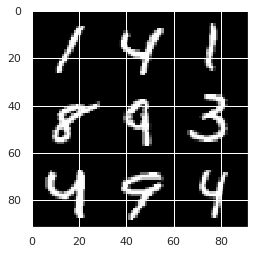

In [0]:
real = torchvision.utils.make_grid(real, nrow=3)
show_images(real)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


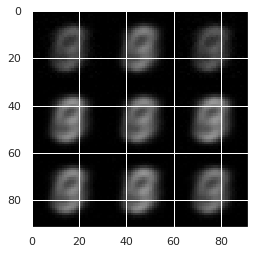

In [0]:
recons = torchvision.utils.make_grid(recons, nrow=3)
show_images(recons)

## TODO: Classifier on the imagenet dataset

## TODO: Answer the following questions:

**Question 1:** What kind of preprocessing can we do on images before training to improve the classification?

**Question 2:** Name a few state of the art image classifier architectures?

**Question 3:** What is dropout?

**Question 4:** What are skip (also called residual) connections?

## TODO: Autoencoder with convolutional layers on MNIST